In [ ]:
#!git clone https://github.com/sameerab04/cs1640-takis3.git
#!unzip dummy-data.zip
df = pandas.read_csv("cs1640-takis3/state_expression.tsv", sep="\t")
df.reset_index(drop=True, inplace=True)
df.to_csv("sample.tsv", sep="\t")
#df = pandas.read_csv("dummy-data/small_simulation/save/data/data.1.txt", sep="\t")
df

,E83_98,E28_199,E24_470,E86_236,E5_26,E70_161,E59_268,E36_473,E49_409,E50_430,...,E14_392,E19_227,E69_448,E23_175,E3_46,E27_386,E17_216,E78_205,E30_375,E79_367
0,2,2,1,2,2,2,2,1,1,1,...,2,2,1,2,2,1,2,2,1,1
1,1,2,2,2,1,1,2,2,1,2,...,2,1,1,1,0,1,1,1,2,2
2,1,2,1,2,1,2,2,1,2,1,...,2,2,2,2,1,2,2,2,2,2
3,2,2,1,2,2,2,2,1,2,1,...,2,2,1,2,2,2,2,2,2,1
4,1,2,1,2,1,1,2,1,2,1,...,2,1,2,1,1,2,1,1,1,1
5,2,2,2,2,2,2,2,2,1,2,...,2,2,1,2,2,1,2,2,2,2
6,1,1,1,1,1,1,1,1,2,1,...,1,1,2,1,0,2,1,1,1,1


In [ ]:
%%capture
!git clone https://github.com/cmu-phil/causal-learn.git
!unzip dummy-data.zip

In [ ]:
import numpy as np
import networkx
import pandas
import scipy
import sklearn
import statsmodels
import pydot


In [ ]:
%%capture
!pip install causal-learn

import sys
import time

sys.path.append("")
import unittest

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz

In [ ]:
# data_path = "data_linear_10.txt"
# data_path = "/content/causal-learn/tests/data_discrete_10.txt"
#data_path = "/content/dummy-data/small_simulation/save/data/data.1.txt"
data_path = "sample.tsv"
data = np.loadtxt(data_path, skiprows=1)  # Import the file at data_path as data
cg = pc(data, 0.05, gsq, True, 0,
    -1)  # Run PC and obtain the estimated graph (CausalGraph object)

        # visualization using pydot
cg.draw_pydot_graph()



  0%|          | 0/101 [00:00<?, ?it/s]

DiGraph with 101 nodes and 2 edges
Green: undirected; Blue: directed; Red: bi-directed



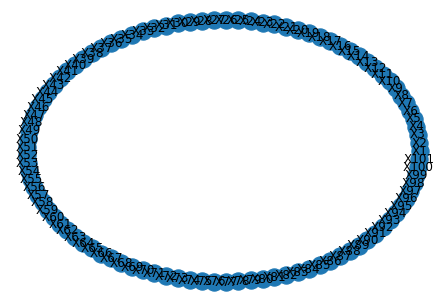

PRECISION: 1.0 	RECALL: 1.0


In [ ]:
# visualization using networkx
print(cg.nx_graph)
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

np.set_printoptions(threshold=sys.maxsize)
cg_adj = networkx.to_numpy_array(cg.nx_graph).astype(int)
#cg_adj

import causallearn
from causallearn.graph.Graph import Graph
from causallearn.graph.AdjacencyConfusion import AdjacencyConfusion

accuracy = AdjacencyConfusion(cg.G, cg.G)
print("PRECISION:", accuracy.get_adj_precision(), "\tRECALL:", accuracy.get_adj_recall())